In [4]:
#importing necessary libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder


In [6]:
Data=pd.read_csv("C:/Users/HP/Desktop/model/data.csv")

In [7]:
Data

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [8]:
Data.columns

Index(['index', 'id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [9]:
Data.dtypes

index            int64
id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [10]:
Data.describe()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,34999.500000,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,20207.403759,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17499.750000,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,34999.500000,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,52499.250000,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,69999.000000,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [12]:
Data.isnull().sum()

index          0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [13]:
Data.duplicated().sum()

0

<Axes: >

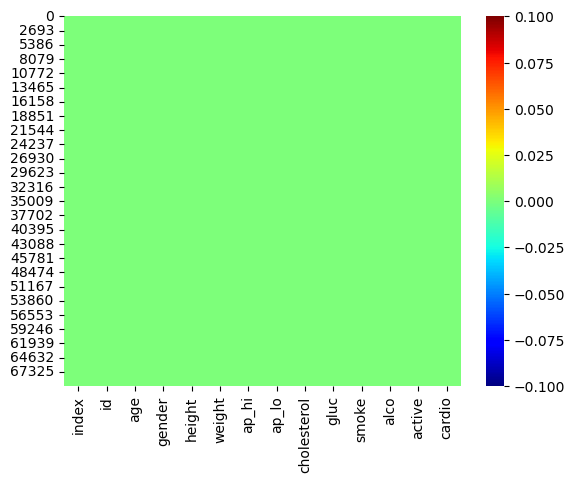

In [14]:
sns.heatmap(Data.isnull(), cmap = 'jet')

In [15]:
Data.drop(['index','id'], axis=1, inplace =True)
Data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [16]:
# Let's convert gender into 0 and 1 form. Supposing 2 is for female and 1 for male.

In [17]:
Data['gender'] = Data['gender'].map({2:0,1:1})

In [18]:
#Since the Age is in days, so we are converting it to years for better understanding

In [19]:
Data['age'] = Data['age'].apply(lambda x : int(x/365))
Data['age']

0        50
1        55
2        51
3        48
4        47
         ..
69995    52
69996    61
69997    52
69998    61
69999    56
Name: age, Length: 70000, dtype: int64

In [20]:
Data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,0,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,0,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [21]:
Data.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [22]:
X=Data.drop(columns=['cardio'])
y=Data['cardio']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [24]:
# Measuring performance

In [25]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred))
    print("Recall : ", recall_score(y_test, y_pred))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*20+ "\n" + " "* 10+ "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_pred))
    print("**"*27+"\n")

    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['No Cardiovascular Disease', 'Cardiovascular Disease'])
    cm.plot()

In [26]:
#Training the model
#Random Forest

Precision :  0.7165187186414512
Recall :  0.6974079639368895
Accuracy :  0.7066666666666667
F1 Score :  0.7068341899866742

 [[7414 2938]
 [3222 7426]]


****************************************
          Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.70      0.72      0.71     10352
           1       0.72      0.70      0.71     10648

    accuracy                           0.71     21000
   macro avg       0.71      0.71      0.71     21000
weighted avg       0.71      0.71      0.71     21000

******************************************************



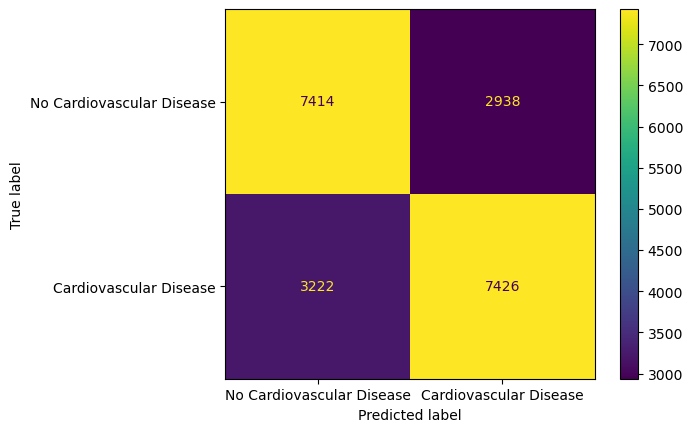

In [27]:
Model1 = RandomForestClassifier()
Model1.fit(X_train, y_train)
RandomForestClassifier()
y_pred_rf =Model1.predict(X_test)
perform(y_pred_rf)

In [28]:
#GaussianNB

Precision :  0.7361963190184049
Recall :  0.270473328324568
Accuracy :  0.580952380952381
F1 Score :  0.3956043956043956

 [[9320 1032]
 [7768 2880]]


****************************************
          Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.55      0.90      0.68     10352
           1       0.74      0.27      0.40     10648

    accuracy                           0.58     21000
   macro avg       0.64      0.59      0.54     21000
weighted avg       0.64      0.58      0.54     21000

******************************************************



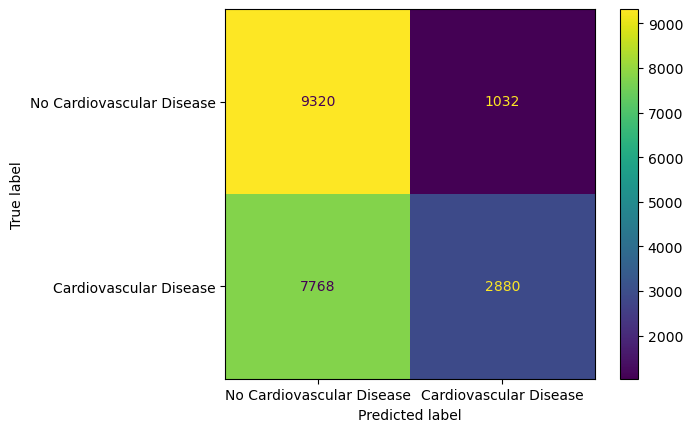

In [29]:
Model2 = GaussianNB()
Model2.fit(X_train, y_train)
GaussianNB()
y_pred_nb = Model2.predict(X_test)
perform(y_pred_nb)

In [30]:
#Support Vector Classifer

Precision :  0.7811021759697256
Recall :  0.6203042824943651
Accuracy :  0.7193333333333334
F1 Score :  0.6914782244556112

 [[8501 1851]
 [4043 6605]]


****************************************
          Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.68      0.82      0.74     10352
           1       0.78      0.62      0.69     10648

    accuracy                           0.72     21000
   macro avg       0.73      0.72      0.72     21000
weighted avg       0.73      0.72      0.72     21000

******************************************************



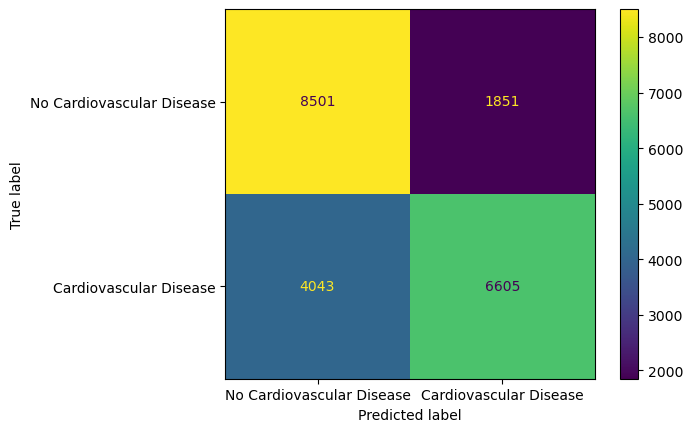

In [31]:
Model3 = SVC()
Model3.fit(X_train, y_train)
SVC()
y_pred_svc = Model3.predict(X_test)
perform(y_pred_svc)

In [32]:
#Decision Tree

Precision :  0.6434502295594412
Recall :  0.6186138241923366
Accuracy :  0.6328095238095238
F1 Score :  0.6307876466363418

 [[6702 3650]
 [4061 6587]]


****************************************
          Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.62      0.65      0.63     10352
           1       0.64      0.62      0.63     10648

    accuracy                           0.63     21000
   macro avg       0.63      0.63      0.63     21000
weighted avg       0.63      0.63      0.63     21000

******************************************************



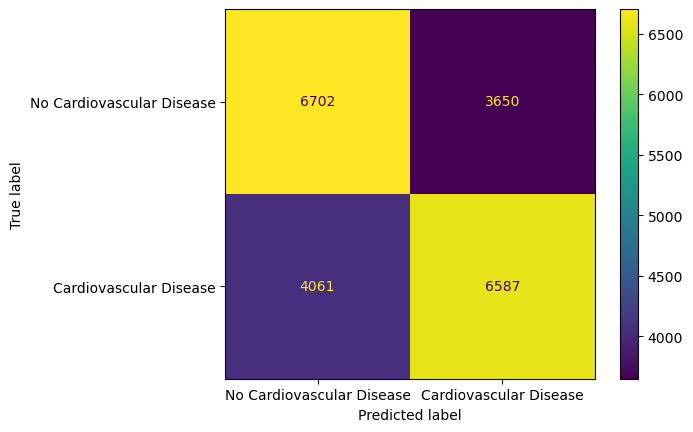

In [33]:
Model4 =DecisionTreeClassifier()
Model4.fit(X_train, y_train)
DecisionTreeClassifier()
y_pred_dt =Model4.predict(X_test)
perform(y_pred_dt)

In [34]:
#Logistic Regression

Precision :  0.7370227816498491
Recall :  0.6653831705484599
Accuracy :  0.709952380952381
F1 Score :  0.6993731800009871

 [[7824 2528]
 [3563 7085]]


****************************************
          Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.69      0.76      0.72     10352
           1       0.74      0.67      0.70     10648

    accuracy                           0.71     21000
   macro avg       0.71      0.71      0.71     21000
weighted avg       0.71      0.71      0.71     21000

******************************************************



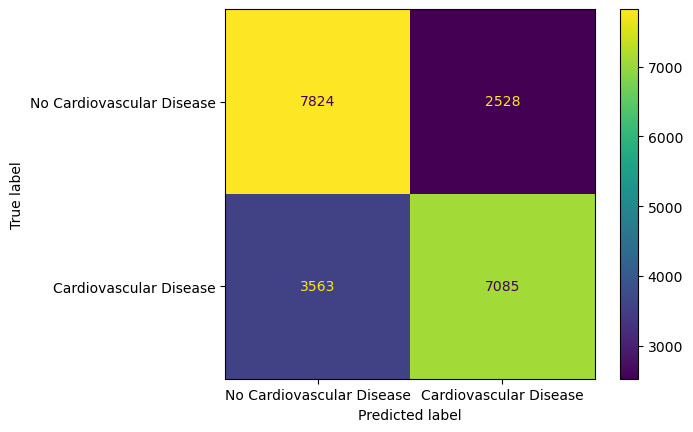

In [35]:
Model5 = LogisticRegression()
Model5 .fit(X_train, y_train)
LogisticRegression()
y_pred_lr =Model5 .predict(X_test)
perform(y_pred_lr)

In [36]:
import pickle

In [37]:
with open("model_pickle.pkl","wb") as file:
  pickle.dump(Model3,file)